## 라이브러리 호출 및 함수 정의

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
import seaborn as sns

#import timeit

#from numpy import random
#from scipy.stats import norm, multivariate_normal
#from scipy import interpolate
#from scipy.stats.mvn import mvnun
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#from mvbin import mvbin

In [6]:
df = pd.read_csv("../../Data/data_chro/chro_all.csv")
df.drop(df.columns[0], axis=1, inplace=True)
df

,SNP,pval,z.score,CHR,baseL2,Coding_UCSC.bedL2,Conserved_LindbladToh.bedL2,CTCF_Hoffman.bedL2,DGF_ENCODE.bedL2,DHS_peaks_Trynka.bedL2,...,Promoter_UCSC.bedL2,Repressed_Hoffman.bedL2,SuperEnhancer_Hnisz.bedL2,TFBS_ENCODE.bedL2,Transcribed_Hoffman.bedL2,TSS_Hoffman.bedL2,UTR_3_UCSC.bedL2,UTR_5_UCSC.bedL2,WeakEnhancer_Hoffman.bedL2,MAF
0,rs4075116,0.044325,1.702557,1,80.322,0.000,0.0,0.0,30.498,0.0,...,0.000,0.000,61.995,41.299,0.000,0.0,0.000,0.000,0.0,0.2607
1,rs3766192,0.273955,0.600895,1,92.250,10.446,0.0,0.0,36.261,0.0,...,24.356,0.000,73.288,0.000,54.057,0.0,5.552,4.765,0.0,0.4560
2,rs9442372,0.277037,0.591667,1,95.054,0.000,0.0,0.0,0.000,0.0,...,24.750,0.000,76.393,0.000,56.273,0.0,0.000,0.000,0.0,0.4448
3,rs3737728,0.151858,1.028498,1,68.811,0.000,0.0,0.0,0.000,0.0,...,0.000,0.000,53.212,0.000,41.831,0.0,0.000,0.000,0.0,0.2648
4,rs9442398,0.118996,1.180019,1,74.355,0.000,0.0,0.0,27.908,0.0,...,0.000,0.000,58.218,0.000,45.350,0.0,0.000,0.000,0.0,0.2618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029220,rs2606356,0.182860,0.904519,9,69.858,0.000,0.0,0.0,12.515,0.0,...,0.000,0.000,0.000,0.000,10.532,0.0,0.000,0.000,0.0,0.2004
1029221,rs2606357,0.585754,-0.216635,9,66.182,0.000,0.0,0.0,11.882,0.0,...,0.000,0.000,0.000,0.000,14.369,0.0,0.000,0.000,0.0,0.4969
1029222,rs2606358,0.539876,-0.100122,9,51.978,0.000,0.0,0.0,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.4090
1029223,rs2739260,0.400908,0.250997,9,91.484,0.000,0.0,0.0,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.4755


In [24]:
df.max()

SNP                               rs9999992
pval                                    1.0
z.score                                 inf
CHR                                      22
baseL2                             5090.065
Coding_UCSC.bedL2                    95.483
Conserved_LindbladToh.bedL2          80.722
CTCF_Hoffman.bedL2                  129.211
DGF_ENCODE.bedL2                    642.163
DHS_peaks_Trynka.bedL2              385.195
DHS_Trynka.bedL2                    552.361
Enhancer_Andersson.bedL2             25.054
Enhancer_Hoffman.bedL2              179.649
FetalDHS_Trynka.bedL2               244.621
H3K27ac_Hnisz.bedL2                2216.838
H3K27ac_PGC2.bedL2                 1414.263
H3K4me1_peaks_Trynka.bedL2          939.983
H3K4me1_Trynka.bedL2               1887.888
H3K4me3_peaks_Trynka.bedL2          341.089
H3K4me3_Trynka.bedL2               1107.134
H3K9ac_peaks_Trynka.bedL2           271.918
H3K9ac_Trynka.bedL2                 833.503
Intron_UCSC.bedL2               

In [23]:
df_X = df.iloc[:,5:]
((df_X >0).sum() / len(df)).mean()

0.19081531885809633

## Result of SNP analysis

### original

In [2]:
origin = pd.read_csv("../../Data/result_final/resultSNP/pval_compared_all.csv")
origin.drop(origin.columns[0], inplace=True, axis=1)
origin.head()

,CHR,SNP,pval,FWER,BH,qval
0,1,rs4075116,0.044325,1.0,0.791301,0.791301
1,1,rs3766192,0.273955,1.0,0.983887,0.983887
2,1,rs9442372,0.277037,1.0,0.984505,0.984505
3,1,rs3737728,0.151858,1.0,0.936983,0.936983
4,1,rs9442398,0.118996,1.0,0.907345,0.907345


In [3]:
rejected = []
for i in range(1,23):
    rejected += [len(origin[origin.CHR == i])]
    
result = pd.DataFrame(rejected).T
result.columns = ['chro'+str(i) for i in range(1,23)]
result.index = ['#ofSNPs']
all_result = result.T
all_result

,#ofSNPs
chro1,81816
chro2,88755
chro3,71994
chro4,64797
chro5,66281
chro6,66291
chro7,57026
chro8,58063
chro9,48421
chro10,56138


In [48]:
ihw = pd.read_csv("../../Data/result_final/resultSNP/chro_ihw_all.csv")
ihw.drop(ihw.columns[0], inplace=True, axis=1)
ihw.rename(columns={'X':'SNP'}, inplace=True)

bl = pd.read_csv("../../Data/result_final/resultSNP/chro_bl_all.csv")
bl.drop(bl.columns[0], inplace=True, axis=1)
bl.rename(columns={'X':'SNP'}, inplace=True)

for col in ihw.columns[4:-1]:
    ihw.rename(columns={col:col.split('.')[0]}, inplace=True)
    bl.rename(columns={col:col.split('.')[0]}, inplace=True)
    
ihw.head()

,SNP,CHR,pval,baseL2,Coding_UCSC,Conserved_LindbladToh,CTCF_Hoffman,DGF_ENCODE,DHS_peaks_Trynka,DHS_Trynka,...,Promoter_UCSC,Repressed_Hoffman,SuperEnhancer_Hnisz,TFBS_ENCODE,Transcribed_Hoffman,TSS_Hoffman,UTR_3_UCSC,UTR_5_UCSC,WeakEnhancer_Hoffman,MAF
0,rs4075116,1,0.044325,0.930290,0.762856,0.759265,0.790523,0.849274,0.760937,0.751326,...,0.793522,1.000000,0.842418,0.492384,0.802662,0.801783,0.797289,0.763940,0.756165,0.597932
1,rs3766192,1,0.273955,0.888457,0.985180,0.981904,0.986146,0.981732,0.966313,0.972648,...,0.985542,0.992306,0.994172,0.988958,1.000000,0.985180,0.984361,0.985179,0.983261,0.941310
2,rs9442372,1,0.277037,0.915194,0.989617,0.988628,0.986146,0.968403,0.968255,0.969709,...,0.963023,1.000000,0.994172,1.000000,1.000000,0.987215,0.988683,0.990956,0.983706,1.000000
3,rs3737728,1,0.151858,1.000000,0.937117,0.957339,0.907764,0.944870,0.923371,0.929243,...,0.901576,0.867974,0.968779,0.950860,1.000000,0.887006,0.900553,0.890262,0.938504,0.822826
4,rs9442398,1,0.118996,1.000000,0.911507,0.889567,0.900811,0.969642,0.888490,0.862410,...,0.915101,0.867974,0.953998,0.913706,0.913201,0.921324,0.891781,0.915765,0.848837,0.751306


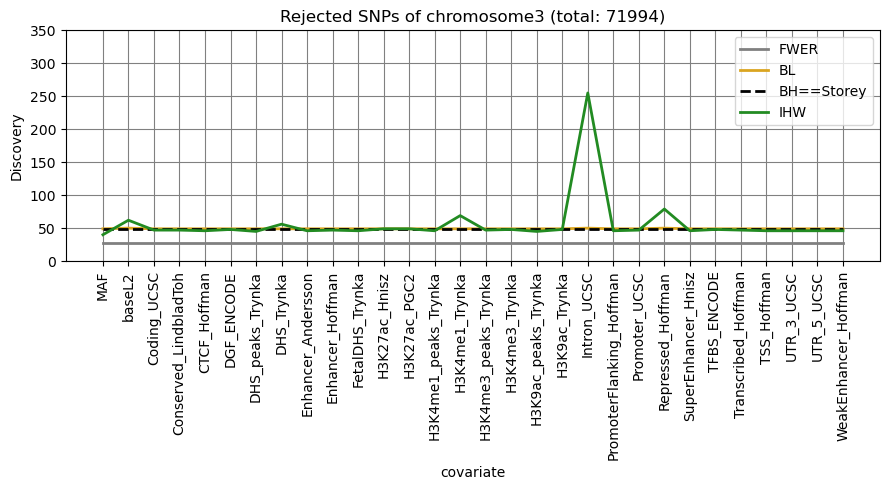

In [118]:
X_columns = list(ihw.columns[3:])
result = pd.DataFrame(index=X_columns, columns=['FWER','BH','qval', 'IHW', 'BL'])

# chromosome i
i=3
origin_chro = origin[origin.CHR == i].reset_index(drop=True)
ihw_chro = ihw[ihw.CHR == i].reset_index(drop=True)
bl_chro = bl[bl.CHR == i].reset_index(drop=True)

# Result of original method
for method in ['FWER','BH','qval']:
    result.loc[:, method] = len(origin_chro[origin_chro[method] <= 0.05])

# Result of IHW and BocaLeek
for col in X_columns:
    result.loc[col, 'IHW'] = len(ihw_chro[ihw_chro[col] <= 0.05])
    result.loc[col, 'BL'] = len(bl_chro[bl_chro[col] <= 0.05])


result = result.reindex(['MAF', 'baseL2'] + result.index.to_list()[1:-1])

# Draw result
plt.figure(figsize=(9,5))
plt.plot(result[['FWER']], color="grey", linewidth=2, label = 'FWER')
plt.plot(result[['BL']], color="goldenrod", linewidth=2, label = 'BL')
plt.plot(result[['BH']], color="black", linewidth=2, linestyle='--',label = 'BH==Storey')
plt.plot(result[['IHW']], color="forestgreen", linewidth=2, label = 'IHW')

plt.title('Rejected SNPs of chromosome%d (total: %d)'%(i, all_result.iloc[i-1,0]))
plt.legend(loc='upper right')
plt.xlabel("covariate")
plt.ylabel("Discovery")
plt.grid(color="grey")
plt.xticks(rotation=90)
if result['IHW'].max() <= 50:
    plt.yticks(range(0, 60, 10))
elif result['IHW'].max() <= 100:
    plt.yticks(range(0, 120, 25))
else:
    plt.yticks(range(0, 375, 50))
plt.tight_layout()

plt.show()

In [119]:
for i in range(1,23):
    X_columns = list(ihw.columns[3:])
    result = pd.DataFrame(index=X_columns, columns=['FWER','BH','qval', 'IHW', 'BL'])
    
    # chromosome i
    origin_chro = origin[origin.CHR == i].reset_index(drop=True)
    ihw_chro = ihw[ihw.CHR == i].reset_index(drop=True)
    bl_chro = bl[bl.CHR == i].reset_index(drop=True)

    # Result of original method
    for method in ['FWER','BH','qval']:
        result.loc[:, method] = len(origin_chro[origin_chro[method] <= 0.05])

    # Result of IHW and BocaLeek
    for col in X_columns:
        result.loc[col, 'IHW'] = len(ihw_chro[ihw_chro[col] <= 0.05])
        result.loc[col, 'BL'] = len(bl_chro[bl_chro[col] <= 0.05])


    result = result.reindex(['MAF', 'baseL2'] + result.index.to_list()[1:-1])

    # Draw result
    plt.figure(figsize=(9,5))
    plt.plot(result[['FWER']], color="grey", linewidth=2, label = 'FWER')
    plt.plot(result[['BL']], color="goldenrod", linewidth=2, label = 'BL')
    plt.plot(result[['BH']], color="black", linewidth=2, linestyle='--',label = 'BH==Storey')
    plt.plot(result[['IHW']], color="forestgreen", linewidth=2, label = 'IHW')
    
    plt.title('Rejected SNPs of chromosome%d (total: %d)'%(i, all_result.iloc[i-1,0]))
    plt.legend(loc='upper right')
    plt.xlabel("covariate")
    plt.ylabel("Discovery")
    plt.grid(color="grey")
    plt.xticks(rotation=90)
    if result['IHW'].max() <= 50:
        plt.yticks(range(0, 60, 10))
    elif result['IHW'].max() <= 100:
        plt.yticks(range(0, 120, 25))
    else:
        plt.yticks(range(0, 375, 50))
    plt.tight_layout()

    plt.savefig("../../Figure/SNP/result_chro%d_SNP_disc.pdf"%i)
    plt.close()

### PC transformation

In [59]:
ihw = pd.read_csv("../../Data/result_final/resultSNP/chro_ihw_pca_all.csv")
ihw.drop(ihw.columns[0], inplace=True, axis=1)
ihw.rename(columns={'X':'SNP'}, inplace=True)

bl = pd.read_csv("../../Data/result_final/resultSNP/chro_bl_pca_all.csv")
bl.drop(bl.columns[0], inplace=True, axis=1)
bl.rename(columns={'X':'SNP'}, inplace=True)

    
ihw.head()

,SNP,CHR,pval,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,rs4075116,1,0.044325,0.583575,0.689886,0.878236,0.709721,0.610428,0.937665,0.899095,...,0.619658,0.437684,0.691479,0.895968,0.655824,0.783572,0.679854,1.000000,0.883222,0.942573
1,rs3766192,1,0.273955,0.966597,0.995314,0.926747,0.918991,0.939503,1.000000,1.000000,...,0.909502,0.720512,0.984400,0.983359,0.972755,0.868186,1.000000,1.000000,1.000000,1.000000
2,rs9442372,1,0.277037,0.887372,1.000000,1.000000,1.000000,0.892681,0.983365,1.000000,...,0.868250,0.866260,0.919383,1.000000,0.941719,0.951911,0.978971,0.915138,1.000000,0.943802
3,rs3737728,1,0.151858,1.000000,1.000000,0.991835,0.909446,0.922999,1.000000,0.948327,...,0.653135,0.686645,0.903249,0.913732,0.923300,0.944072,0.657786,1.000000,1.000000,1.000000
4,rs9442398,1,0.118996,0.745769,1.000000,0.931026,0.960729,0.835091,0.979029,0.906089,...,0.785971,0.529655,0.874076,0.872683,0.909139,0.835514,0.867973,0.800457,0.902408,1.000000


In [121]:
for i in range(1,23):
    X_columns = list(ihw.columns[3:])
    result = pd.DataFrame(index=X_columns, columns=['FWER','BH','qval', 'IHW', 'BL'])
    
    # chromosome i
    origin_chro = origin[origin.CHR == i].reset_index(drop=True)
    ihw_chro = ihw[ihw.CHR == i].reset_index(drop=True)
    bl_chro = bl[bl.CHR == i].reset_index(drop=True)

    # Result of original method
    for method in ['FWER','BH','qval']:
        result.loc[:, method] = len(origin_chro[origin_chro[method] <= 0.05])

    # Result of IHW and BocaLeek
    for col in X_columns:
        result.loc[col, 'IHW'] = len(ihw_chro[ihw_chro[col] <= 0.05])
        result.loc[col, 'BL'] = len(bl_chro[bl_chro[col] <= 0.05])


    #result = result.reindex(['MAF', 'baseL2'] + result.index.to_list()[1:-1])

    # Draw result
    plt.figure(figsize=(9,5))
    plt.plot(result[['FWER']], color="grey", linewidth=2, label = 'FWER')
    plt.plot(result[['BL']], color="goldenrod", linewidth=2, label = 'BL')
    plt.plot(result[['BH']], color="black", linewidth=2, linestyle='--',label = 'BH==Storey')
    plt.plot(result[['IHW']], color="forestgreen", linewidth=2, label = 'IHW')
    
    plt.title('Rejected SNPs of chromosome%d (total: %d)'%(i, all_result.iloc[i-1,0]))
    plt.legend(loc='upper right')
    plt.xlabel("covariate")
    plt.ylabel("Discovery")
    plt.grid(color="grey")
    plt.xticks(rotation=90)
    plt.tight_layout()
    if result['IHW'].max() <= 50:
        plt.yticks(range(0, 60, 10))
    elif result['IHW'].max() <= 100:
        plt.yticks(range(0, 120, 25))
    else:
        plt.yticks(range(0, 375, 50))

    plt.savefig("../../Figure/SNP_PCA/result_chro%d_SNP_PCA_disc.pdf"%i)
    plt.close()

### Scatterplot

In [49]:
rejected_SNP = dict()

i=3

pval_compared = origin[origin.CHR == i].reset_index(drop=True)

rejected_SNP['BH'] = pval_compared[pval_compared.BH <= 0.05].SNP.values
rejected_SNP['Storey'] = pval_compared[pval_compared.qval <= 0.05].SNP.values

ihw3 = ihw[ihw.CHR == i].reset_index(drop=True)

for cov in ihw3.columns[3:]:
    snp = ihw3[ihw3[cov] <= 0.05].SNP.values
    rejected_SNP[cov] = snp
    
rejected_SNP

{'BH': array(['rs4858696', 'rs6804842', 'rs12053817', 'rs9846073', 'rs13099397',
        'rs6785875', 'rs7629340', 'rs815710', 'rs9812845', 'rs7632056',
        'rs6779752', 'rs9816536', 'rs9819476', 'rs9829032', 'rs9834708',
        'rs13096280', 'rs7611991', 'rs7355953', 'rs13059866', 'rs13098327',
        'rs7622475', 'rs9852859', 'rs7640660', 'rs12714640', 'rs9818122',
        'rs7620339', 'rs2122042', 'rs11915638', 'rs13078807', 'rs13092660',
        'rs10513136', 'rs16851483', 'rs3821709', 'rs2035935', 'rs2640017',
        'rs9831938', 'rs4234588', 'rs4686728', 'rs12638263', 'rs10937240',
        'rs4686730', 'rs6444106', 'rs6809651', 'rs4234589', 'rs10513801',
        'rs1356292', 'rs7635103', 'rs7647305', 'rs16860471'], dtype=object),
 'Storey': array(['rs4858696', 'rs6804842', 'rs12053817', 'rs9846073', 'rs13099397',
        'rs6785875', 'rs7629340', 'rs815710', 'rs9812845', 'rs7632056',
        'rs6779752', 'rs9816536', 'rs9819476', 'rs9829032', 'rs9834708',
        'rs130962

In [50]:
data = pd.read_csv("../../Data/result_final/resultSNP/chro_3_ihw.csv").iloc[:,:2]
data.columns = ['SNP', 'pval']

X = pd.read_csv("../../Data/data_chro3/chro_3.csv").iloc[:,3:]

data = pd.concat([data, X], axis=1)
data

,SNP,pval,MAF,Coding_UCSC.bedL2,Conserved_LindbladToh.bedL2,CTCF_Hoffman.bedL2,DGF_ENCODE.bedL2,DHS_peaks_Trynka.bedL2,DHS_Trynka.bedL2,Enhancer_Andersson.bedL2,...,PromoterFlanking_Hoffman.bedL2,Promoter_UCSC.bedL2,Repressed_Hoffman.bedL2,SuperEnhancer_Hnisz.bedL2,TFBS_ENCODE.bedL2,Transcribed_Hoffman.bedL2,TSS_Hoffman.bedL2,UTR_3_UCSC.bedL2,UTR_5_UCSC.bedL2,WeakEnhancer_Hoffman.bedL2
0,rs13060385,0.873669,0.44680,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,58.951,0.0,0.000,0.000,-0.0,0.0,0.0,0.000
1,rs13072188,0.667196,0.42430,0.0,5.558,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.000
2,rs9681213,0.437749,0.28530,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,5.287,0.000,-0.0,-0.0,0.0,0.000
3,rs13089679,0.761128,0.26480,0.0,3.074,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.000,0.000,-0.0,0.0,0.0,0.000
4,rs9682794,0.513112,0.30570,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.000,26.892,-0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71989,rs9877345,0.608651,0.46420,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.000
71990,rs9879842,0.619894,0.46320,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,33.352,0.0,0.000,0.000,0.0,0.0,0.0,0.000
71991,rs12630742,0.147897,0.09918,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,46.211,0.0,0.000,0.000,0.0,0.0,0.0,0.000
71992,rs11916265,0.153004,0.09918,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,6.703


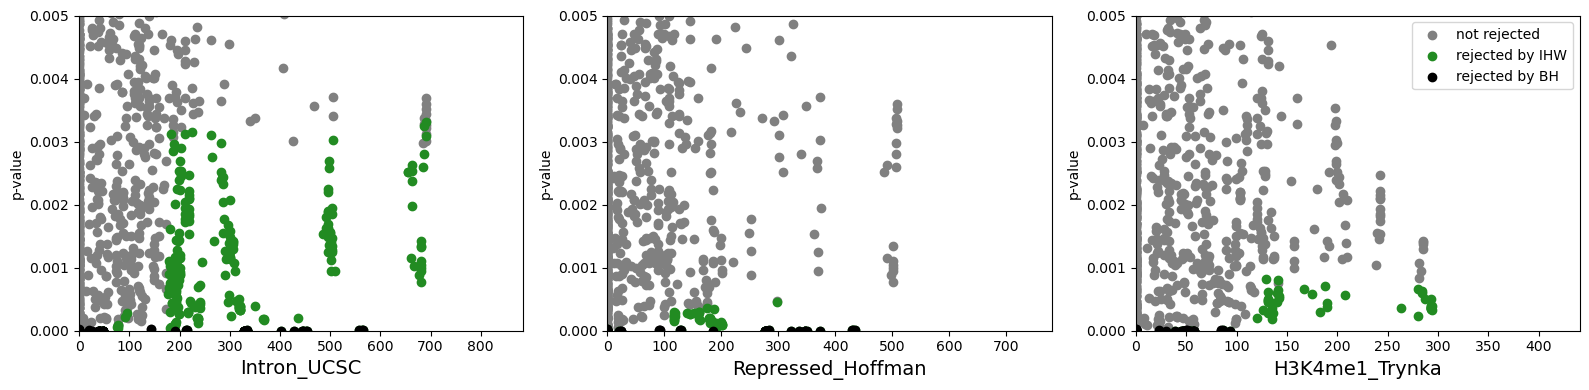

In [51]:
cov_list = ['Intron_UCSC.bedL2', 'Repressed_Hoffman.bedL2', 'H3K4me1_Trynka.bedL2']

plt.figure(figsize=(16,4))
for i in range(3):
    cov = cov_list[i]
    ihw33 = data[data['SNP'].isin(rejected_SNP[cov.split('.')[0]])]
    null = data[~data['SNP'].isin(rejected_SNP[cov.split('.')[0]])]
    bh = data[data['SNP'].isin(rejected_SNP['BH'])]

    plt.subplot(1,3,i+1)
    plt.scatter(x = null[cov], y = null.pval, color = 'grey', label = 'not rejected')
    plt.scatter(x = ihw33[cov], y = ihw33.pval, color = "forestgreen", label = 'rejected by IHW')
    plt.scatter(x = bh[cov], y = bh.pval, color = 'black', label = 'rejected by BH')
    plt.xlim(0,)
    plt.ylim(0, 0.005)
    plt.xlabel(cov.split('.')[0], size = 14)
    plt.ylabel('p-value')
plt.legend()
plt.tight_layout()
#plt.show()
plt.savefig("../../Figure/SNP/result_SNP_scatter.pdf")

In [58]:
len(set(rejected_SNP['BH']) & set(rejected_SNP['Repressed_Hoffman']))

44

In [62]:
rejected_SNP = dict()

i=3

pval_compared = origin[origin.CHR == i].reset_index(drop=True)

rejected_SNP['BH'] = pval_compared[pval_compared.BH <= 0.05].SNP.values
rejected_SNP['Storey'] = pval_compared[pval_compared.qval <= 0.05].SNP.values

ihw3 = ihw[ihw.CHR == i].reset_index(drop=True)

for cov in ihw3.columns[3:]:
    snp = ihw3[ihw3[cov] <= 0.05].SNP.values
    rejected_SNP['IHW_'+cov] = snp
    
rejected_SNP

{'BH': array(['rs4858696', 'rs6804842', 'rs12053817', 'rs9846073', 'rs13099397',
        'rs6785875', 'rs7629340', 'rs815710', 'rs9812845', 'rs7632056',
        'rs6779752', 'rs9816536', 'rs9819476', 'rs9829032', 'rs9834708',
        'rs13096280', 'rs7611991', 'rs7355953', 'rs13059866', 'rs13098327',
        'rs7622475', 'rs9852859', 'rs7640660', 'rs12714640', 'rs9818122',
        'rs7620339', 'rs2122042', 'rs11915638', 'rs13078807', 'rs13092660',
        'rs10513136', 'rs16851483', 'rs3821709', 'rs2035935', 'rs2640017',
        'rs9831938', 'rs4234588', 'rs4686728', 'rs12638263', 'rs10937240',
        'rs4686730', 'rs6444106', 'rs6809651', 'rs4234589', 'rs10513801',
        'rs1356292', 'rs7635103', 'rs7647305', 'rs16860471'], dtype=object),
 'Storey': array(['rs4858696', 'rs6804842', 'rs12053817', 'rs9846073', 'rs13099397',
        'rs6785875', 'rs7629340', 'rs815710', 'rs9812845', 'rs7632056',
        'rs6779752', 'rs9816536', 'rs9819476', 'rs9829032', 'rs9834708',
        'rs130962

In [63]:
data = pd.read_csv("../../Data/result_final/resultSNP/chro_3_ihw_pca.csv").iloc[:,:2]
data.columns = ['SNP', 'pval']

X_pca = pd.read_csv("../../Data/data_chro/chro_X_pca.csv").iloc[:,1:]

data = pd.concat([data,X_pca], axis=1)
data

,SNP,pval,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,rs13060385,0.873669,1.554447,-0.106283,0.061616,0.154031,-0.466855,0.551315,-0.140566,0.638118,...,0.058543,-0.050422,-0.095537,0.015036,-0.009457,0.109064,0.053664,0.003851,-0.064259,0.119189
1,rs13072188,0.667196,1.282252,0.282273,0.373156,0.921109,0.171196,0.276402,0.778811,-0.121221,...,-0.173974,-0.078819,-0.033455,0.752967,-0.039650,0.087332,-0.014963,0.014061,0.064950,-0.412655
2,rs9681213,0.437749,1.315392,-0.268350,0.705968,-0.116578,0.015884,0.026713,-0.209543,0.152702,...,-0.168044,-0.123597,-0.016566,0.002246,-0.024070,0.002136,-0.011114,-0.242285,0.024158,-0.275277
3,rs13089679,0.761128,1.288009,0.066920,0.650875,0.373239,0.234621,-0.082473,0.493596,-0.243232,...,-0.059245,-0.020825,0.157413,0.368014,-0.016603,-0.081463,-0.256061,0.274790,-0.041848,-0.238239
4,rs9682794,0.513112,1.411029,0.027148,0.287655,-0.077035,0.008464,-0.158768,-0.023721,0.078703,...,0.127617,0.373169,-0.245842,0.128716,-0.004668,0.100144,0.100968,0.052198,0.075714,-0.370723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71989,rs9877345,0.608651,1.183898,-0.041741,0.403098,-0.258447,-0.040155,0.448582,-0.160294,0.739144,...,0.231388,-0.116122,0.379194,0.154187,-0.015223,0.412286,0.764394,0.270926,0.043493,-0.317858
71990,rs9879842,0.619894,1.529931,-0.127631,0.204088,0.070622,-0.310505,0.449352,-0.142640,0.661390,...,0.064786,-0.071665,-0.082619,0.015471,-0.005774,0.094708,0.056263,0.015977,-0.014314,-0.060120
71991,rs12630742,0.147897,1.556566,-0.076674,0.176770,0.164247,-0.448405,-0.077820,0.049012,-0.372199,...,0.092199,0.325429,-0.127121,0.077325,-0.004221,0.042646,0.045873,0.036894,0.108728,-0.558160
71992,rs11916265,0.153004,0.690129,-1.136067,0.713408,-0.138661,-0.087677,0.677024,-0.076939,-4.303129,...,0.757695,0.903878,0.101383,0.102187,0.175408,-0.130932,0.053817,-0.014734,0.094184,-0.720077


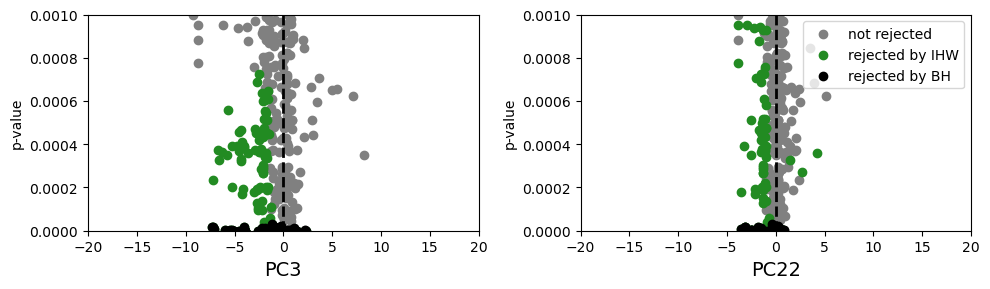

In [80]:
pc_list = ['PC3', 'PC22']

plt.figure(figsize=(10,3))
for pc in pc_list:
    ihw = data[data['SNP'].isin(rejected_SNP['IHW_'+pc])]
    null = data[~data['SNP'].isin(rejected_SNP['IHW_'+pc])]
    bh = data[data['SNP'].isin(rejected_SNP['BH'])]
    i = pc_list.index(pc)+1
    plt.subplot(1,2,i)
    plt.scatter(x = null[pc], y = null.pval, color = 'grey', label = 'not rejected')
    plt.scatter(x = ihw[pc], y = ihw.pval, color = "forestgreen", label = 'rejected by IHW')
    plt.scatter(x = bh[pc], y = bh.pval, color = 'black', label = 'rejected by BH')
    plt.axvline(x=0, color="black", linewidth=2, linestyle='--')
    plt.xlim(-20,20)
    plt.ylim(0, 0.001)
    plt.xlabel(pc, size = 14)
    plt.ylabel('p-value')
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.4f'))
plt.legend(loc='upper right')
plt.tight_layout()
#plt.show()
plt.savefig("../../Figure/SNP_PCA/result_SNP_PCA_scatter.pdf")

In [16]:
cov_list = ['DHS_Trynka.bedL2', 'H3K4me1_Trynka.bedL2', 'Intron_UCSC.bedL2']
cov_name = ['DHS','H3K4','Intron']


for i in range(3):
    cov = cov_list[i]
    ihw = data[data['SNP'].isin(rejected_SNP[cov])]
    null = data[~data['SNP'].isin(rejected_SNP[cov])]
    bh = data[data['SNP'].isin(rejected_SNP['BH'])]

    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    plt.scatter(x = null[cov], y = null.pval, color = 'grey', label = 'not rejected')
    plt.scatter(x = ihw[cov], y = ihw.pval, color = "forestgreen", label = 'rejected by IHW')
    plt.scatter(x = bh[cov], y = bh.pval, color = 'black', label = 'rejected by BH')
    plt.xlim(0,)
    plt.ylim(0, 0.004)
    plt.xlabel(cov[:-6], size = 14)
    plt.ylabel('p-value')
    #plt.legend()
    
    plt.subplot(1,2,2)
    plt.scatter(x = null[cov], y = null.pval, color = 'grey', label = 'not rejected')
    plt.scatter(x = ihw[cov], y = ihw.pval, color = "forestgreen", label = 'rejected by IHW')
    plt.scatter(x = bh[cov], y = bh.pval, color = 'black', label = 'rejected by BH')
    plt.xlim(0,)
    plt.ylim(0, 0.05)
    plt.xlabel(cov[:-6], size = 14)
    plt.ylabel('p-value')
    plt.legend(loc="upper right")
    
    plt.tight_layout()
    plt.savefig("../../Figure/SNP/result_SNP_scatter_%s.pdf"%cov_name[i])
    plt.clf()

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

### PC transformation

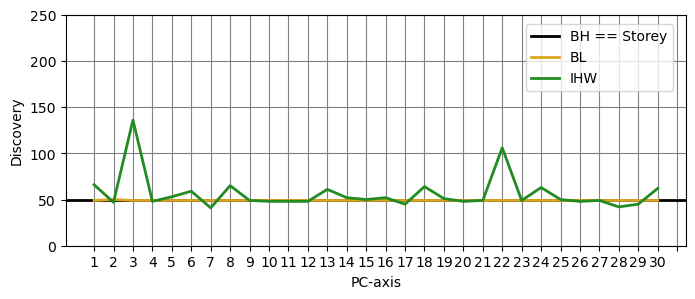

In [17]:
IHW = pd.DataFrame([66,47,136,48,53,59,41,65,49,48,
                     48,48,61,52,50,52,45,64,51,48,
                     49,106,49,63,50,48,49,42,45,62])
IHW.index = [str(i) for i in list(range(1,31))]

BL = pd.DataFrame([49,50,49,49,49,49,49,49,49,49,49,49,49,49,49,
                  49,49,49,49,49,49,49,49,49,49,49,49,49,49,49])
BL.index = [str(i) for i in list(range(1,31))]

plt.figure(figsize=(8,3))
plt.axhline(y=49, color="black", linewidth=2, label = 'BH == Storey')
plt.plot(BL, color="goldenrod", linewidth=2, label = 'BL')
plt.plot(IHW, color="forestgreen", linewidth=2, label = 'IHW')

plt.legend(bbox_to_anchor=(0.99, 0.99))
plt.ylim((0, 250))
plt.xlabel("PC-axis")
plt.ylabel("Discovery")
plt.grid(color="grey")
plt.xticks(np.arange(0, 31, step=1))
#plt.tight_layout()

plt.savefig("../../Figure/SNP_PCA/result_SNP_PCA_disc.pdf", bbox_inches='tight', pad_inches=1.5)

### load dataframe

In [18]:
rejected_SNP = dict()

pval_compared = pd.read_csv("../../Data/result_final/resultSNP/pval_compared_3.csv")
pval_compared.rename(columns = {pval_compared.columns[0]:'SNP'}, inplace=True)

rejected_SNP['BH'] = pval_compared[pval_compared.BH <= 0.05].SNP.values
rejected_SNP['Storey'] = pval_compared[pval_compared.qval <= 0.05].SNP.values


ihw = pd.read_csv("../../Data/result_final/resultSNP/chro_3_ihw_pca.csv")
ihw.columns = ['SNP', 'pval'] + ['PC' + str(i) for i in list(range(1,31))]

for pc in ['PC' + str(i) for i in list(range(1,31))]:
    snp = ihw[ihw[pc] <= 0.05].SNP.values
    rejected_SNP['IHW_'+pc] = snp
    
rejected_SNP

{'BH': array(['rs4858696', 'rs6804842', 'rs12053817', 'rs9846073', 'rs13099397',
        'rs6785875', 'rs7629340', 'rs815710', 'rs9812845', 'rs7632056',
        'rs6779752', 'rs9816536', 'rs9819476', 'rs9829032', 'rs9834708',
        'rs13096280', 'rs7611991', 'rs7355953', 'rs13059866', 'rs13098327',
        'rs7622475', 'rs9852859', 'rs7640660', 'rs12714640', 'rs9818122',
        'rs7620339', 'rs2122042', 'rs11915638', 'rs13078807', 'rs13092660',
        'rs10513136', 'rs16851483', 'rs3821709', 'rs2035935', 'rs2640017',
        'rs9831938', 'rs4234588', 'rs4686728', 'rs12638263', 'rs10937240',
        'rs4686730', 'rs6444106', 'rs6809651', 'rs4234589', 'rs10513801',
        'rs1356292', 'rs7635103', 'rs7647305', 'rs16860471'], dtype=object),
 'Storey': array(['rs4858696', 'rs6804842', 'rs12053817', 'rs9846073', 'rs13099397',
        'rs6785875', 'rs7629340', 'rs815710', 'rs9812845', 'rs7632056',
        'rs6779752', 'rs9816536', 'rs9819476', 'rs9829032', 'rs9834708',
        'rs130962

In [19]:
data = pd.read_csv("../../Data/result_final/resultSNP/chro_3_ihw_pca.csv").iloc[:,:2]
data.columns = ['SNP', 'pval']

X_pca = pd.read_csv("../../Data/data_chro/chro_X_pca.csv").iloc[:,1:]

data = pd.concat([data,X_pca], axis=1)
data

,SNP,pval,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,rs13060385,0.873669,1.554447,-0.106283,0.061616,0.154031,-0.466855,0.551315,-0.140566,0.638118,...,0.058543,-0.050422,-0.095537,0.015036,-0.009457,0.109064,0.053664,0.003851,-0.064259,0.119189
1,rs13072188,0.667196,1.282252,0.282273,0.373156,0.921109,0.171196,0.276402,0.778811,-0.121221,...,-0.173974,-0.078819,-0.033455,0.752967,-0.039650,0.087332,-0.014963,0.014061,0.064950,-0.412655
2,rs9681213,0.437749,1.315392,-0.268350,0.705968,-0.116578,0.015884,0.026713,-0.209543,0.152702,...,-0.168044,-0.123597,-0.016566,0.002246,-0.024070,0.002136,-0.011114,-0.242285,0.024158,-0.275277
3,rs13089679,0.761128,1.288009,0.066920,0.650875,0.373239,0.234621,-0.082473,0.493596,-0.243232,...,-0.059245,-0.020825,0.157413,0.368014,-0.016603,-0.081463,-0.256061,0.274790,-0.041848,-0.238239
4,rs9682794,0.513112,1.411029,0.027148,0.287655,-0.077035,0.008464,-0.158768,-0.023721,0.078703,...,0.127617,0.373169,-0.245842,0.128716,-0.004668,0.100144,0.100968,0.052198,0.075714,-0.370723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71989,rs9877345,0.608651,1.183898,-0.041741,0.403098,-0.258447,-0.040155,0.448582,-0.160294,0.739144,...,0.231388,-0.116122,0.379194,0.154187,-0.015223,0.412286,0.764394,0.270926,0.043493,-0.317858
71990,rs9879842,0.619894,1.529931,-0.127631,0.204088,0.070622,-0.310505,0.449352,-0.142640,0.661390,...,0.064786,-0.071665,-0.082619,0.015471,-0.005774,0.094708,0.056263,0.015977,-0.014314,-0.060120
71991,rs12630742,0.147897,1.556566,-0.076674,0.176770,0.164247,-0.448405,-0.077820,0.049012,-0.372199,...,0.092199,0.325429,-0.127121,0.077325,-0.004221,0.042646,0.045873,0.036894,0.108728,-0.558160
71992,rs11916265,0.153004,0.690129,-1.136067,0.713408,-0.138661,-0.087677,0.677024,-0.076939,-4.303129,...,0.757695,0.903878,0.101383,0.102187,0.175408,-0.130932,0.053817,-0.014734,0.094184,-0.720077


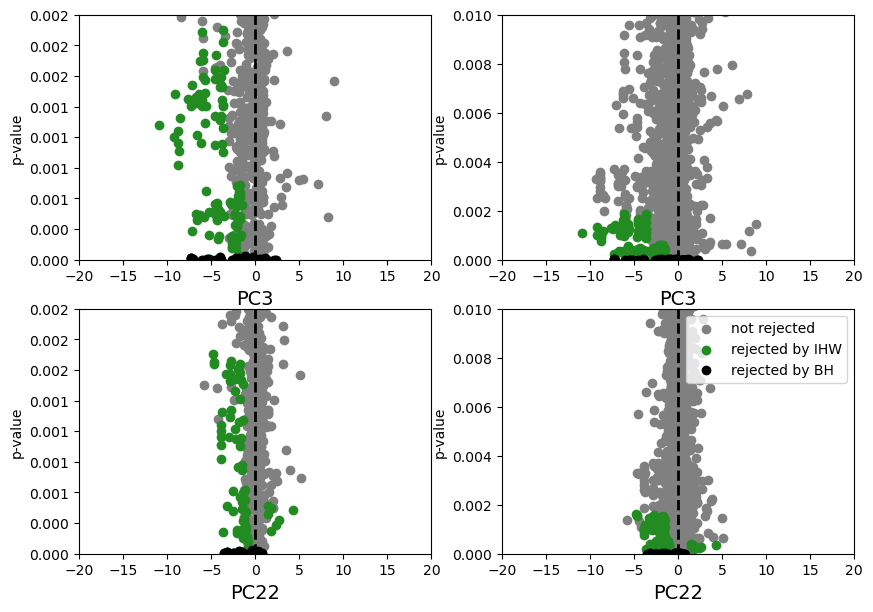

In [20]:
pc_list = ['PC3', 'PC22']

plt.figure(figsize=(10,7))
for pc in pc_list:
    ihw = data[data['SNP'].isin(rejected_SNP['IHW_'+pc])]
    null = data[~data['SNP'].isin(rejected_SNP['IHW_'+pc])]
    bh = data[data['SNP'].isin(rejected_SNP['BH'])]
    i = pc_list.index(pc)*2
    plt.subplot(2,2,1+i)
    plt.scatter(x = null[pc], y = null.pval, color = 'grey', label = 'not rejected')
    plt.scatter(x = ihw[pc], y = ihw.pval, color = "forestgreen", label = 'rejected by IHW')
    plt.scatter(x = bh[pc], y = bh.pval, color = 'black', label = 'rejected by BH')
    plt.axvline(x=0, color="black", linewidth=2, linestyle='--')
    plt.xlim(-20,20)
    plt.ylim(0, 0.002)
    plt.xlabel(pc, size = 14)
    plt.ylabel('p-value')
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

    plt.subplot(2,2,2+i)
    plt.scatter(x = null[pc], y = null.pval, color = 'grey', label = 'not rejected')
    plt.scatter(x = ihw[pc], y = ihw.pval, color = "forestgreen", label = 'rejected by IHW')
    plt.scatter(x = bh[pc], y = bh.pval, color = 'black', label = 'rejected by BH')
    plt.axvline(x=0, color="black", linewidth=2, linestyle='--')
    plt.xlim(-20,20)
    plt.ylim(0, 0.01)
    plt.xlabel(pc, size = 14)
    plt.ylabel('p-value')
plt.legend(loc = "upper right")
#plt.tight_layout()
#plt.show()
plt.savefig("../../Figure/SNP_PCA/result_SNP_PCA_scatter_whole.pdf")

In [22]:
pc_list = ['PC3', 'PC22']

for i in range(2):
    pc = pc_list[i]
    ihw = data[data['SNP'].isin(rejected_SNP['IHW_'+pc])]
    null = data[~data['SNP'].isin(rejected_SNP['IHW_'+pc])]
    bh = data[data['SNP'].isin(rejected_SNP['BH'])]

    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    plt.scatter(x = null[pc], y = null.pval, color = 'grey', label = 'not rejected')
    plt.scatter(x = ihw[pc], y = ihw.pval, color = "forestgreen", label = 'rejected by IHW')
    plt.scatter(x = bh[pc], y = bh.pval, color = 'black', label = 'rejected by BH')
    plt.axvline(x=0, color="black", linewidth=2, linestyle='--')
    plt.xlim(-20,20)
    plt.ylim(0, 0.002)
    plt.xlabel(pc, size = 14)
    plt.ylabel('p-value')
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
    
    plt.subplot(1,2,2)
    plt.scatter(x = null[pc], y = null.pval, color = 'grey', label = 'not rejected')
    plt.scatter(x = ihw[pc], y = ihw.pval, color = "forestgreen", label = 'rejected by IHW')
    plt.scatter(x = bh[pc], y = bh.pval, color = 'black', label = 'rejected by BH')
    plt.axvline(x=0, color="black", linewidth=2, linestyle='--')
    plt.xlim(-20,20)
    plt.ylim(0, 0.01)
    plt.xlabel(pc, size = 14)
    plt.ylabel('p-value')
    plt.legend(loc="upper right")
    
    plt.tight_layout()
    plt.savefig("../../Figure/SNP_PCA/result_SNP_PCA_scatter_%s.pdf"%pc)
    plt.clf()

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

### PC loadings

In [24]:
df = pd.read_csv("../../Data/data_chro/chro_all.csv")
df.drop(df.columns[0], axis=1, inplace=True)
chro_3 = df[df.CHR==3].drop('CHR', axis=1).reset_index(drop=True)
cov_list = list(chro_3.columns[:3]) + [chro_3.columns[-1]] + list(chro_3.columns[4:-1])
chro_3 = chro_3[cov_list]
chro_3

,SNP,pval,z_score,MAF,Coding_UCSC.bedL2,Conserved_LindbladToh,CTCF_Hoffman,DGF_ENCODE,DHS_peaks_Trynka,DHS_Trynka,...,PromoterFlanking_Hoffman,Promoter_UCSC,Repressed_Hoffman,SuperEnhancer_Hnisz,TFBS_ENCODE,Transcribed_Hoffman,TSS_Hoffman,UTR_3_UCSC,UTR_5_UCSC,WeakEnhancer_Hoffman
0,rs13060385,0.873669,-1.143907,0.44680,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,58.951,0.0,0.000,0.000,-0.0,0.0,0.0,0.000
1,rs13072188,0.667196,-0.432183,0.42430,0.0,5.558,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.000
2,rs9681213,0.437749,0.156679,0.28530,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,5.287,0.000,-0.0,-0.0,0.0,0.000
3,rs13089679,0.761128,-0.709935,0.26480,0.0,3.074,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.000,0.000,-0.0,0.0,0.0,0.000
4,rs9682794,0.513112,-0.032872,0.30570,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.000,26.892,-0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71989,rs9877345,0.608651,-0.275805,0.46420,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.000
71990,rs9879842,0.619894,-0.305203,0.46320,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,33.352,0.0,0.000,0.000,0.0,0.0,0.0,0.000
71991,rs12630742,0.147897,1.045496,0.09918,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,46.211,0.0,0.000,0.000,0.0,0.0,0.0,0.000
71992,rs11916265,0.153004,1.023633,0.09918,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,6.703


In [27]:
X = np.array(chro_3.drop(['SNP','pval','z_score'], axis=1))
pc_columns = ['PC'+str(i) for i in range(1,30)]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

pca = PCA()
X_pca = pd.DataFrame(pca.fit_transform(X_scaled), columns = pc_columns)

true_eigenvalue = pd.DataFrame(pca.components_).transpose()
true_eigenvalue.index = chro_3.columns[3:]
true_eigenvalue.columns = pc_columns
true_eigenvalue

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29
MAF,0.035607,-0.005589,-0.064326,-0.109109,0.300856,0.438430,0.408362,-0.060721,0.214538,0.271552,...,-0.026936,0.016898,0.079026,-0.014164,0.010377,-0.001863,-0.014139,-0.009066,-0.001745,-0.005211
Coding_UCSC.bedL2,0.091063,0.413454,0.398914,-0.212146,-0.079283,0.085858,-0.032091,-0.006319,-0.044918,0.047518,...,0.025147,0.087535,-0.149822,0.052329,0.711430,0.034432,-0.007063,-0.152833,0.047143,0.020999
Conserved_LindbladToh,0.064954,0.121983,0.231986,-0.211479,0.126576,0.133671,-0.241538,0.209970,-0.149227,0.034225,...,-0.038543,-0.074275,0.062387,-0.034375,-0.217637,-0.012793,-0.004986,0.022240,0.006934,-0.004633
CTCF_Hoffman,0.065393,-0.098653,0.083732,-0.038396,-0.173274,-0.341950,0.640481,0.118283,0.120657,0.191662,...,-0.229759,0.076110,-0.109068,0.034847,-0.031208,0.027047,0.023719,-0.031370,0.000588,0.010814
DGF_ENCODE,0.233703,-0.200231,0.123174,-0.138984,0.006913,-0.057441,-0.006000,-0.078140,0.039113,0.014090,...,-0.385606,0.089603,0.029579,-0.046212,-0.025409,-0.366308,-0.073960,0.044186,-0.015528,0.057247
DHS_peaks_Trynka,0.231162,-0.356471,0.207182,-0.226807,0.044603,-0.022702,-0.085985,-0.129353,-0.005525,-0.079330,...,-0.092090,0.037647,-0.005933,0.028466,-0.021889,0.483419,0.031424,-0.088195,0.089110,-0.639925
DHS_Trynka,0.254100,-0.338821,0.173118,-0.216967,0.045306,-0.002717,-0.062555,-0.112646,-0.019333,-0.059349,...,0.052650,0.004273,-0.009015,-0.016485,-0.019447,0.357736,0.113374,-0.022629,-0.061664,0.742978
Enhancer_Andersson,0.040007,-0.080382,0.022604,0.045532,-0.188217,0.309874,-0.203163,0.453423,0.676418,-0.079371,...,-0.008560,-0.015876,-0.009720,-0.015098,-0.002350,0.031237,0.001661,0.000692,0.001527,0.008019
Enhancer_Hoffman,0.157314,-0.088819,-0.023193,0.135494,-0.229626,0.237565,-0.054505,0.123249,0.024754,-0.110446,...,-0.243008,0.093161,-0.115164,-0.013647,0.009046,0.016037,0.057246,0.061536,0.008839,0.001133
FetalDHS_Trynka,0.220141,-0.326679,0.200168,-0.121993,0.023044,0.012220,-0.080369,-0.070350,-0.017962,-0.083805,...,0.121040,0.004367,-0.048506,0.072780,0.082938,-0.666838,-0.137677,0.057533,-0.016882,-0.081037


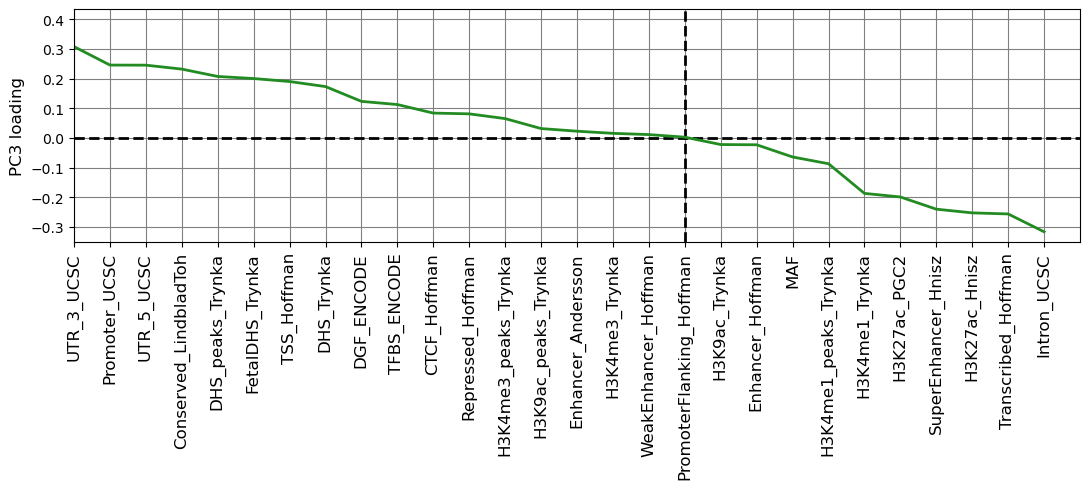

In [30]:
tmp = true_eigenvalue[['PC3']].round(4)
tmp.sort_values('PC3', ascending=False, inplace=True)


plt.figure(figsize=(11,5))
plt.axvline(x=18, color="black", linewidth=2, linestyle='--')
plt.axhline(y=0, color="black", linewidth=2, linestyle='--')
plt.plot(tmp, color="forestgreen", linewidth=2)

#plt.xlabel("covariate")
plt.ylabel("PC3 loading", size=12)
plt.xlim(1,29)
plt.grid(color="grey")
plt.xticks(np.arange(1, 29, step=1))
plt.xticks(rotation=90, size=12)
plt.tight_layout()

plt.savefig("../../Figure/SNP_PCA/result_PC3_loading_graph.pdf")
#plt.show()

In [33]:
#!pip install dataframe-image
import dataframe_image as dfi

tmp = true_eigenvalue[['PC3','PC22']].round(4)
tmp.sort_values('PC3', ascending=False, inplace=True)

dfi.export(tmp, "../../Figure/SNP_PCA/result_PC3_loadings.png", max_cols = -1, max_rows = -1)

In [34]:
tmp = true_eigenvalue[['PC3','PC22']].round(4)
tmp.sort_values('PC22', ascending=False, inplace=True)

dfi.export(tmp, "../../Figure/SNP_PCA/result_PC22_loadings.png", max_cols = -1, max_rows = -1)

### Scatterplot for PC3 and PC22

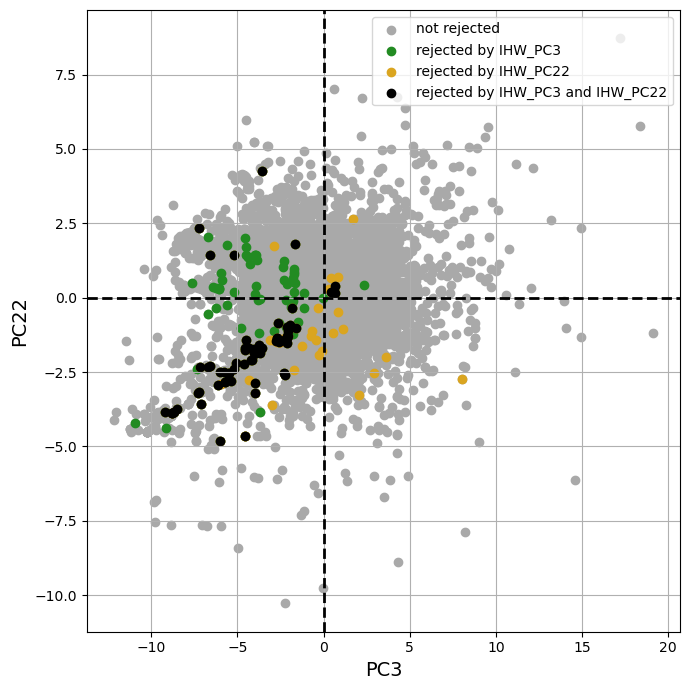

In [35]:
ihw_pc3 = data[data['SNP'].isin(rejected_SNP['IHW_PC3'])]
ihw_pc22 = data[data['SNP'].isin(rejected_SNP['IHW_PC22'])]

both_list = np.array(list(set(rejected_SNP['IHW_PC3']) & set(rejected_SNP['IHW_PC22'])))
ihw_both = data[data['SNP'].isin(both_list)]

plt.figure(figsize=(7,7))

plt.scatter(x = data.PC3, y = data.PC22, color = 'darkgrey', label = 'not rejected')
plt.scatter(x = ihw_pc3.PC3, y = ihw_pc3.PC22, color = "forestgreen", label = 'rejected by IHW_PC3')
plt.scatter(x = ihw_pc22.PC3, y = ihw_pc22.PC22, color = "goldenrod", label = 'rejected by IHW_PC22')
plt.scatter(x = ihw_both.PC3, y = ihw_both.PC22, color = "black", label = 'rejected by IHW_PC3 and IHW_PC22')
plt.axvline(x=0, color="black", linewidth=2, linestyle='--')
plt.axhline(y=0, color="black", linewidth=2, linestyle='--')

plt.xlabel('PC3', size = 14)
plt.ylabel('PC22', size = 14)
plt.legend(loc="upper right")
plt.grid()
plt.tight_layout()
plt.savefig("../../Figure/SNP_PCA/result_SNP_PCA_loading.pdf")
#plt.show()